Name: *Naman Singh*
Roll: 45
Class: BE(IT)
Subject:LP-IV(DL)


In [28]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD 
import numpy as np 
import random
import matplotlib.pyplot as plt

In [30]:
# import os
# os.environ['CUDA _VISIBLE DEVICES'] ='-1'

In [31]:
x_train = np.loadtxt('C:\\Users\\Naman\\Downloads\\DL Labs Code\\datasets\\input.csv',delimiter =',')
y_train = np.loadtxt ('C:\\Users\\Naman\\Downloads\\DL Labs Code\\datasets\\labels.csv',delimiter =',') 

In [32]:
x_test =  np.loadtxt('C:\\Users\\Naman\\Downloads\\DL Labs Code\\datasets\\input.csv',delimiter =',')
y_test = np.loadtxt ('C:\\Users\\Naman\\Downloads\\DL Labs Code\\datasets\\labels.csv',delimiter =',')

In [33]:
x_train = x_train.reshape (len (x_train), 100, 100, 3)
y_train = y_train.reshape (len(y_train), 1) 

In [34]:
x_test = x_test . reshape(len(x_test),100, 100,3)
y_test = y_test. reshape (len(y_test), 1)

In [35]:
x_train = x_train/255.0
x_test=x_test/255.0 

In [36]:
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape) 


Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (2000, 100, 100, 3)
Shape of X_train: (2000, 1)


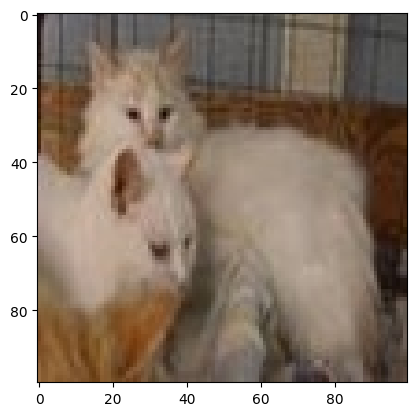

In [37]:
idx = random.randint(0, len(x_train)) 
plt.imshow(x_train[idx, :]) 
plt.show() 

In [38]:
from tensorflow.keras.layers import BatchNormalization

In [39]:
model = Sequential([
        Conv2D(256, (3,3) , activation = 'relu', input_shape=(100, 100, 3)), 
        BatchNormalization(),
        MaxPooling2D((4, 4)), Conv2D(128, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),
        Conv2D(64, (3,3), activation = 'relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(1, activation='sigmoid') 
    ])

In [40]:
opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy']) 

In [41]:
model.fit(x_train,y_train,epochs=4,batch_size=50, validation_data=(x_test, y_test))

Epoch 1/4
40/40 [==============================] - 69s 2s/step - loss: 0.8252 - accuracy: 0.5530 - val_loss: 0.7016 - val_accuracy: 0.5015
Epoch 2/4
40/40 [==============================] - 76s 2s/step - loss: 0.6456 - accuracy: 0.6290 - val_loss: 0.7109 - val_accuracy: 0.5200
Epoch 3/4
40/40 [==============================] - 75s 2s/step - loss: 0.6127 - accuracy: 0.6595 - val_loss: 0.6522 - val_accuracy: 0.6335
Epoch 4/4
40/40 [==============================] - 74s 2s/step - loss: 0.5619 - accuracy: 0.7170 - val_loss: 0.6182 - val_accuracy: 0.6655


In [42]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 15s 229ms/step - loss: 0.6182 - accuracy: 0.6655


[0.6182253360748291, 0.6654999852180481]

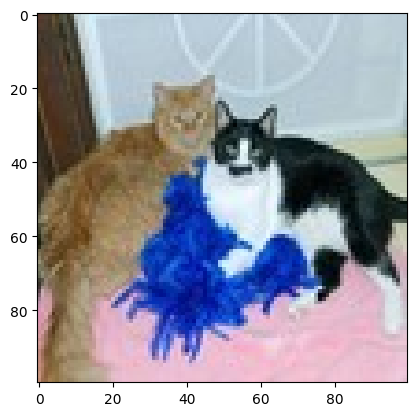

In [43]:
idx2 = random.randint(0, len(y_test)) 
plt.imshow(x_test [idx2, :]) 
plt.show()


In [44]:
y_pred=model.predict(x_test[idx2,:].reshape(1, 100,100, 3)) 
y_pred = y_pred>0.5
if(y_pred==0):
  pred='dog'
else:
  pred='cat'
print("Our model says it is a",pred) 

1/1 [==============================] - 0s 110ms/step
Our model says it is a dog


In [45]:
score=model.evaluate(x_test, y_test, verbose=0)
print ("Test Score: ", score[0]) 
print("Test accuracy: ", score[1]) 

Test Score:  0.6182253360748291
Test accuracy:  0.6654999852180481


In [46]:
model.summary () 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization_3 (Bat  (None, 98, 98, 256)       1024      
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_4 (Bat  (None, 22, 22, 128)       512       
 chNormalization)                                                
                                                      

In [47]:
val = model.fit(x_train,y_train, epochs=4, batch_size=50, validation_data=(x_test, y_test))

Epoch 1/4
40/40 [==============================] - 69s 2s/step - loss: 0.5048 - accuracy: 0.7435 - val_loss: 0.8052 - val_accuracy: 0.5450
Epoch 2/4
40/40 [==============================] - 65s 2s/step - loss: 0.4852 - accuracy: 0.7730 - val_loss: 0.6157 - val_accuracy: 0.6375
Epoch 3/4
40/40 [==============================] - 61s 2s/step - loss: 0.4511 - accuracy: 0.7805 - val_loss: 0.6466 - val_accuracy: 0.6355
Epoch 4/4
40/40 [==============================] - 61s 2s/step - loss: 0.4144 - accuracy: 0.8145 - val_loss: 0.4845 - val_accuracy: 0.7660


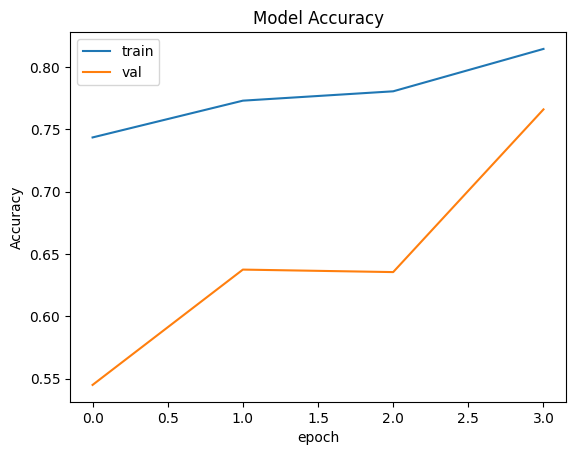

In [48]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel('epoch') 
plt.plot(val.history['accuracy']) 
plt.plot(val.history['val_accuracy'])
plt.legend(['train', 'val'])
plt.show()